In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
from PIL import Image

# Function to load and preprocess images
def load_and_preprocess_images(image_paths):
    images = []
    for path in image_paths:
        img = Image.open(path).convert("RGBA")  # Convert to RGBA format
        img = img.resize((224, 224))  # Resize as needed
        img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img_array)
    return images


In [9]:
import pickle

loaded = False
with open("image_data.pkl", "rb") as file:
    image_data = pickle.load(file)
    loaded = True
    train_images_array, train_labels_array = image_data[0]
    test_images_array, test_labels_array = image_data[1]

TypeError: file must have 'read' and 'readline' attributes

In [3]:
# Function to create a simple CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [4]:
# Define the paths to the 'Merged Data' directories
train_data_path = "C:\\Users\\jmdgo\\Downloads\\WaterHyacinth\\WaterHyacinth\\Merged Data\\Train"
test_data_path = "C:\\Users\\jmdgo\\Downloads\\WaterHyacinth\\WaterHyacinth\\Merged Data\\Test"

# Define class names
class_names = ['Water Lettuce (Pistia stratiotes)',
               'Heartleaf False Pickerelweed (Monochoria korsakowii)',
               'Common Water Hyacinth (Eichornia crassipes)',
               'Common Duckweeds (Lemna minor)',
               'Non-Invasive']

In [5]:
# Load and preprocess training images
if not loaded:
    train_data = []
    train_labels = []

    for class_name in class_names:
        class_path = os.path.join(train_data_path, class_name)
        class_contents = [os.path.join(class_path, image_name) for image_name in os.listdir(class_path)]

        for image_path in class_contents:
            train_data.append(image_path)
            train_labels.append(class_names.index(class_name))

    # Convert training data to NumPy arrays
    train_images_array = np.array(load_and_preprocess_images(train_data))
    train_labels_array = np.array(train_labels)

    # Load and preprocess testing images
    test_data = []
    test_labels = []

    for class_name in class_names:
        class_path = os.path.join(test_data_path, class_name)
        class_contents = [os.path.join(class_path, image_name) for image_name in os.listdir(class_path)]

        for image_path in class_contents:
            test_data.append(image_path)
            test_labels.append(class_names.index(class_name))

    # Convert testing data to NumPy arrays
    test_images_array = np.array(load_and_preprocess_images(test_data))
    test_labels_array = np.array(test_labels)
    
    # Save image_data to a pickle file
    with open("image_data.pkl", "wb") as file:
        image_data = ((train_images_array, train_labels_array), (test_images_array, test_labels_array))
        pickle.dump(image_data, file)

In [12]:
# Create the CNN model
input_shape = (224, 224, 4)
num_classes = len(class_names)
model = create_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images_array, train_labels_array, epochs=10, validation_data=(test_images_array, test_labels_array))

Epoch 1/10
183/183 [==============================] - 123s 664ms/step - loss: 1.1017 - accuracy: 0.6440 - val_loss: 0.5393 - val_accuracy: 0.8098
Epoch 2/10
183/183 [==============================] - 111s 609ms/step - loss: 0.3387 - accuracy: 0.8909 - val_loss: 0.3414 - val_accuracy: 0.8912
Epoch 3/10
183/183 [==============================] - 111s 605ms/step - loss: 0.1554 - accuracy: 0.9492 - val_loss: 0.3387 - val_accuracy: 0.8988
Epoch 4/10
183/183 [==============================] - 111s 606ms/step - loss: 0.0457 - accuracy: 0.9884 - val_loss: 0.2667 - val_accuracy: 0.9357
Epoch 5/10
183/183 [==============================] - 111s 607ms/step - loss: 0.0359 - accuracy: 0.9906 - val_loss: 0.3555 - val_accuracy: 0.9118
Epoch 6/10
183/183 [==============================] - 112s 613ms/step - loss: 0.0252 - accuracy: 0.9930 - val_loss: 0.2870 - val_accuracy: 0.9350
Epoch 7/10
183/183 [==============================] - 113s 620ms/step - loss: 0.0423 - accuracy: 0.9868 - val_loss: 0.3175 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


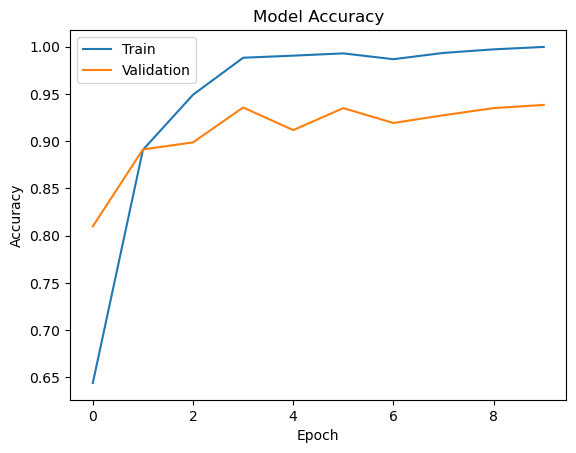

In [14]:
import matplotlib.pyplot as plt
# Print the keys of the history
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
model_save_path = "C:\\Users\\jmdgo\\Downloads\\Hyacinth Model Swag.h5"

# Save the model in .h5 format
model.save(model_save_path)

# Print a message indicating that the model has been saved
print(f"Model saved at: {model_save_path}")


C:\Users\jmdgo\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at: C:\Users\jmdgo\Downloads\Hyacinth Model Swag.h5


1/1 [==============================] - 0s 38ms/step
Predictions: [[8.691497e-25 3.419287e-03 2.825061e-28 6.836228e-26 9.965808e-01]]
Predicted Class Index: 4
Predicted Class Name: Non-Invasive


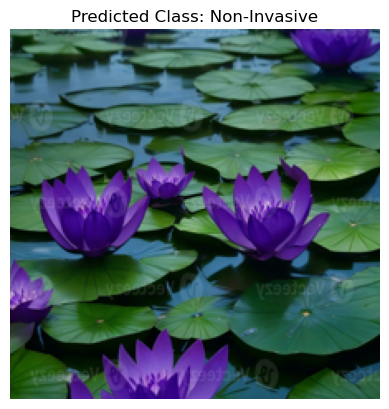

In [45]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf

from PIL import Image

def load_and_preprocess_single_image(image_path):
    img = Image.open(image_path).convert("RGBA")  # Ensure four channels (RGBA)
    img = img.resize((224, 224))  # Resize as needed
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = img_array[:, :, :4]  # Keep only RGB channels
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array


# Specify the path to the image you want to predict
image_path_to_predict = r"C:\Users\jmdgo\Downloads\WaterHyacinth\WaterHyacinth\Merged Data\Test\Non-Invasive\aug_lotus purple pond_8._1.png"

# Load and preprocess the single image
input_image, processed_image = load_and_preprocess_single_image(image_path_to_predict)

# Make a prediction
predictions = model.predict(processed_image)

# Assuming you have class names defined
class_names = ['Water Lettuce', 'Heartleaf False Pickerelweed', 'Common Water Hyacinth', 'Common Duckweeds','Non-Invasive']

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]

# Print the predictions
print("Predictions:", predictions)
print("Predicted Class Index:", predicted_class_index)
print("Predicted Class Name:", predicted_class_name)

# Display the image
plt.imshow(input_image)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 39ms/step
Predictions: [[5.1111968e-26 1.2400218e-13 5.8432302e-26 1.7595063e-22 1.0000000e+00]]
Predicted Class Index: 4
Predicted Class Name: Non-Invasive


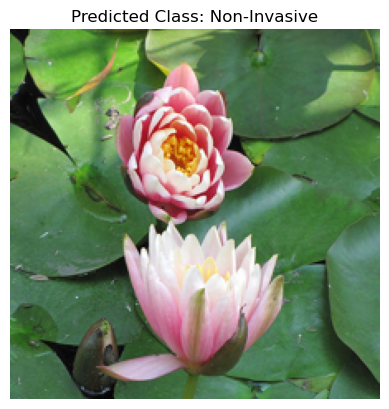

In [43]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf

from PIL import Image

def load_and_preprocess_single_image(image_path):
    img = Image.open(image_path).convert("RGBA")  # Ensure four channels (RGBA)
    img = img.resize((224, 224))  # Resize as needed
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = img_array[:, :, :4]  # Keep only RGB channels
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array


# Specify the path to the image you want to predict
image_path_to_predict = r"C:\Users\jmdgo\Downloads\WaterHyacinth\WaterHyacinth\Merged Data\Test\Non-Invasive\aug_water lily pink_29._1.png"

# Load and preprocess the single image
input_image, processed_image = load_and_preprocess_single_image(image_path_to_predict)

# Make a prediction
predictions = model.predict(processed_image)

# Assuming you have class names defined
class_names = ['Water Lettuce', 'Heartleaf False Pickerelweed', 'Common Water Hyacinth', 'Common Duckweeds','Non-Invasive']

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]

# Print the predictions
print("Predictions:", predictions)
print("Predicted Class Index:", predicted_class_index)
print("Predicted Class Name:", predicted_class_name)

# Display the image
plt.imshow(input_image)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 37ms/step
Predictions: [[2.2004137e-06 7.8269539e-07 9.9999225e-01 4.7763997e-06 2.0610669e-09]]
Predicted Class Index: 2
Predicted Class Name: Common Water Hyacinth


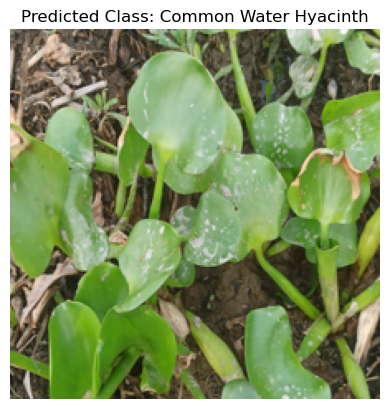

In [40]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf

from PIL import Image

def load_and_preprocess_single_image(image_path):
    img = Image.open(image_path).convert("RGBA")  # Ensure four channels (RGBA)
    img = img.resize((224, 224))  # Resize as needed
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = img_array[:, :, :4]  # Keep only RGB channels
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array


# Specify the path to the image you want to predict
image_path_to_predict = r"C:\Users\jmdgo\Downloads\WaterHyacinth\WaterHyacinth\Merged Data\Test\Common Water Hyacinth (Eichornia crassipes)\augmented_image_5.jpg"

# Load and preprocess the single image
input_image, processed_image = load_and_preprocess_single_image(image_path_to_predict)

# Make a prediction
predictions = model.predict(processed_image)

# Assuming you have class names defined
class_names = ['Water Lettuce', 'Heartleaf False Pickerelweed', 'Common Water Hyacinth', 'Common Duckweeds','Non-Invasive']

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]

# Print the predictions
print("Predictions:", predictions)
print("Predicted Class Index:", predicted_class_index)
print("Predicted Class Name:", predicted_class_name)

# Display the image
plt.imshow(input_image)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 37ms/step
Predictions: [[1.4572078e-11 1.0000000e+00 1.1623691e-13 2.9895809e-18 1.4138817e-10]]
Predicted Class Index: 1
Predicted Class Name: Heartleaf False Pickerelweed


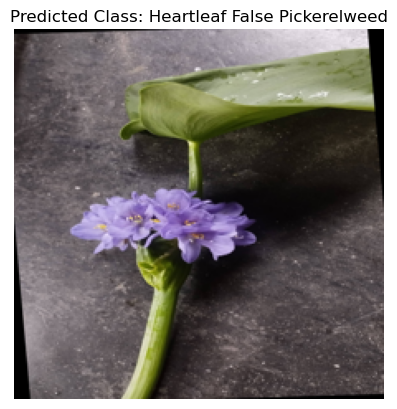

In [46]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf

from PIL import Image

def load_and_preprocess_single_image(image_path):
    img = Image.open(image_path).convert("RGBA")  # Ensure four channels (RGBA)
    img = img.resize((224, 224))  # Resize as needed
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = img_array[:, :, :4]  # Keep only RGB channels
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array


# Specify the path to the image you want to predict
image_path_to_predict = r"C:\Users\jmdgo\Downloads\WaterHyacinth\WaterHyacinth\Merged Data\Test\Heartleaf False Pickerelweed (Monochoria korsakowii)\augmented_image_598.jpg"

# Load and preprocess the single image
input_image, processed_image = load_and_preprocess_single_image(image_path_to_predict)

# Make a prediction
predictions = model.predict(processed_image)

# Assuming you have class names defined
class_names = ['Water Lettuce', 'Heartleaf False Pickerelweed', 'Common Water Hyacinth', 'Common Duckweeds','Non-Invasive']

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]

# Print the predictions
print("Predictions:", predictions)
print("Predicted Class Index:", predicted_class_index)
print("Predicted Class Name:", predicted_class_name)

# Display the image
plt.imshow(input_image)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 38ms/step
Predictions: [[6.8562222e-01 4.1029114e-02 2.7245530e-01 4.2310608e-06 8.8913552e-04]]
Predicted Class Index: 0
Predicted Class Name: Water Lettuce


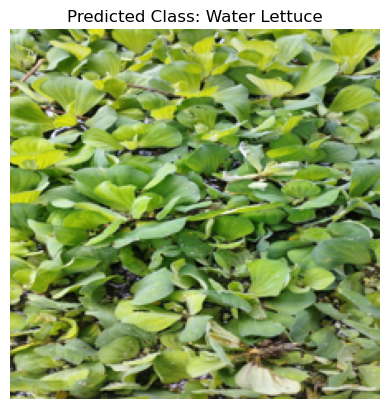

In [47]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf

from PIL import Image

def load_and_preprocess_single_image(image_path):
    img = Image.open(image_path).convert("RGBA")  # Ensure four channels (RGBA)
    img = img.resize((224, 224))  # Resize as needed
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = img_array[:, :, :4]  # Keep only RGB channels
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array


# Specify the path to the image you want to predict
image_path_to_predict = r"C:\Users\jmdgo\Downloads\WaterHyacinth\WaterHyacinth\Merged Data\Test\Water Lettuce (Pistia stratiotes)\augmented_image_69.jpg"

# Load and preprocess the single image
input_image, processed_image = load_and_preprocess_single_image(image_path_to_predict)

# Make a prediction
predictions = model.predict(processed_image)

# Assuming you have class names defined
class_names = ['Water Lettuce', 'Heartleaf False Pickerelweed', 'Common Water Hyacinth', 'Common Duckweeds','Non-Invasive']

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]

# Print the predictions
print("Predictions:", predictions)
print("Predicted Class Index:", predicted_class_index)
print("Predicted Class Name:", predicted_class_name)

# Display the image
plt.imshow(input_image)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 37ms/step
Predictions: [[2.7234581e-08 1.6792600e-12 8.5770671e-07 9.9999917e-01 1.7704346e-08]]
Predicted Class Index: 3
Predicted Class Name: Common Duckweeds


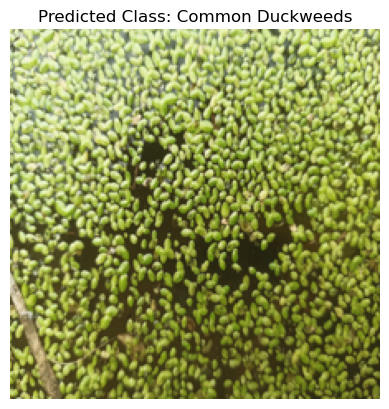

In [48]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf

from PIL import Image

def load_and_preprocess_single_image(image_path):
    img = Image.open(image_path).convert("RGBA")  # Ensure four channels (RGBA)
    img = img.resize((224, 224))  # Resize as needed
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = img_array[:, :, :4]  # Keep only RGB channels
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array


# Specify the path to the image you want to predict
image_path_to_predict = r"C:\Users\jmdgo\Downloads\WaterHyacinth\WaterHyacinth\Merged Data\Test\Common Duckweeds (Lemna minor)\augmented_image_710.jpg"

# Load and preprocess the single image
input_image, processed_image = load_and_preprocess_single_image(image_path_to_predict)

# Make a prediction
predictions = model.predict(processed_image)

# Assuming you have class names defined
class_names = ['Water Lettuce', 'Heartleaf False Pickerelweed', 'Common Water Hyacinth', 'Common Duckweeds','Non-Invasive']

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]

# Print the predictions
print("Predictions:", predictions)
print("Predicted Class Index:", predicted_class_index)
print("Predicted Class Name:", predicted_class_name)

# Display the image
plt.imshow(input_image)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()
